In [2]:
import pandas as pd
import numpy as np

In [3]:
df= pd.read_csv("train (1).csv")
test= pd.read_csv("test.csv")

In [4]:
print(df.shape, test.shape)

(8693, 14) (4277, 13)


In [5]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [17]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [8]:
df.describe(include=object)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


COLUMN SUMMARY

In [9]:
def column_summary(df):
    summary = pd.DataFrame()
    
    summary['Column Name'] = df.columns
    summary['Data Type'] = df.dtypes.values
    summary['Missing Values'] = df.isnull().sum().values
    summary['Unique Values'] = df.nunique().values

   # Separate summary for numerical columns
    numerical_cols = df.select_dtypes(include=['number'])
    
    summary_numerical = pd.DataFrame({
        'Column Name': numerical_cols.columns,
        'Mean': numerical_cols.mean(),
        'Standard Deviation': numerical_cols.std(),
        'Min': numerical_cols.min(),
        'Max': numerical_cols.max()
    }).reset_index(drop=True)
    
    # Merge both summaries (non-numerical columns won't have stats like mean)
    full_summary = pd.merge(summary, summary_numerical, on='Column Name', how='left') #pd.merge to combine the num columns with general col
        #'left' join ensures that non-numerical columns don't break the summary.
    return full_summary

# Call the function and print the summary
summary = column_summary(df)
print(summary)

     Column Name Data Type  Missing Values  Unique Values        Mean  \
0    PassengerId    object               0           8693         NaN   
1     HomePlanet    object             201              3         NaN   
2      CryoSleep    object             217              2         NaN   
3          Cabin    object             199           6560         NaN   
4    Destination    object             182              3         NaN   
5            Age   float64             179             80   28.827930   
6            VIP    object             203              2         NaN   
7    RoomService   float64             181           1273  224.687617   
8      FoodCourt   float64             183           1507  458.077203   
9   ShoppingMall   float64             208           1115  173.729169   
10           Spa   float64             183           1327  311.138778   
11        VRDeck   float64             188           1306  304.854791   
12          Name    object             200         

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [11]:
df['VRDeck'].isna().sum()


188

In [16]:
print('The percentage of missing cells in the data are:',round(df.isna().sum().sum() / df.size * 100, 1),'%')

The percentage of missing cells in the data are: 1.9 %


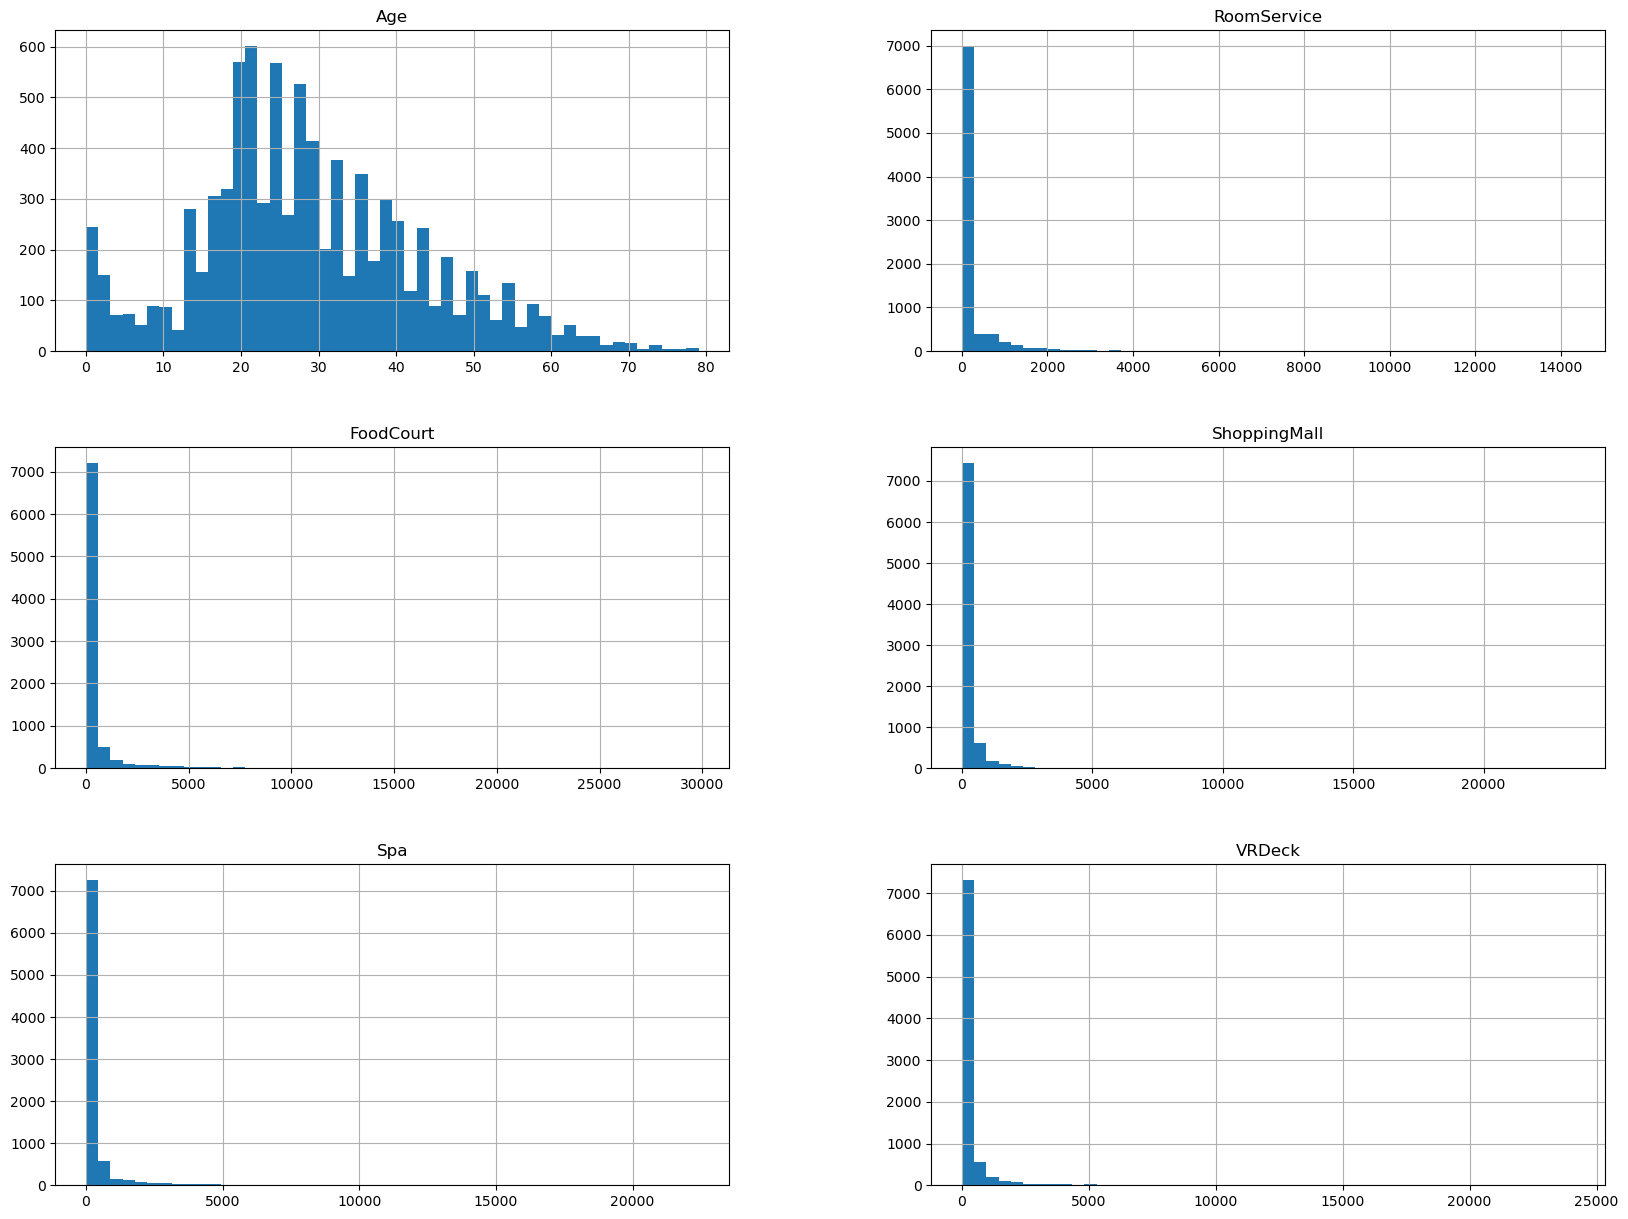

In [13]:
import	matplotlib.pyplot	as	plt
df.hist(bins=50,	figsize=(20,15))
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state= 42)

NameError: name 'X' is not defined